In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image


In [ ]:
dataset=r'/content/drive/MyDrive/Data'
print(dataset)


/content/drive/MyDrive/Data


ImageDataGenrator to generate more images.                        
CNN or any ML model doesn't understand the text labels so we use labelbinalizer **bold text**


In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8 #Batchsize

In [ ]:
import numpy as np
import cv2
import os
from imutils import paths
from keras.preprocessing import image


iPaths = list(paths.list_images(dataset))

data = []
labels = []

for iPath in iPaths:
  label = iPath.split(os.path.sep)[-2]
  image = cv2.imread(iPath) #imread() loads an image from specified file 
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224)) # all images should be of same size so training gets easier

  data.append(image)
  labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)


In [23]:
print(data)

[[[[0.2745098  0.2745098  0.2745098 ]
   [0.28627451 0.28627451 0.28627451]
   [0.29019608 0.29019608 0.29019608]
   ...
   [0.45490196 0.45490196 0.45490196]
   [0.39215686 0.39215686 0.39215686]
   [0.38039216 0.38039216 0.38039216]]

  [[0.28235294 0.28235294 0.28235294]
   [0.27843137 0.27843137 0.27843137]
   [0.28627451 0.28627451 0.28627451]
   ...
   [0.41176471 0.41176471 0.41176471]
   [0.4        0.4        0.4       ]
   [0.40784314 0.40784314 0.40784314]]

  [[0.28627451 0.28627451 0.28627451]
   [0.30980392 0.30980392 0.30980392]
   [0.29411765 0.29411765 0.29411765]
   ...
   [0.38823529 0.38823529 0.38823529]
   [0.4        0.4        0.4       ]
   [0.39607843 0.39607843 0.39607843]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
print(labels)

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Covid' 'Covid' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid

Converting labels into binary classes using LabelBinarizer              
to_categorical function converts class vector into binary class matrix 

In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [ ]:
(X_train , X_test ,Y_train , Y_test) = train_test_split(data , labels , test_size = 0.20 , random_state = 42 , stratify=labels)

**Performing Data Augmentation**

In [ ]:
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

**Building Base Model**

In [ ]:
bmodel = VGG16(weights = "imagenet" , include_top=False,input_tensor=Input(shape=(224,224,3)))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Building Head Model to train on the top layer**

In [ ]:
hmodel = bmodel.output
hmodel = AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel = Flatten(name = 'flatten')(hmodel)
hmodel = Dense(64,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation='softmax')(hmodel)

model = Model(bmodel.input , hmodel)

for layer in bmodel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


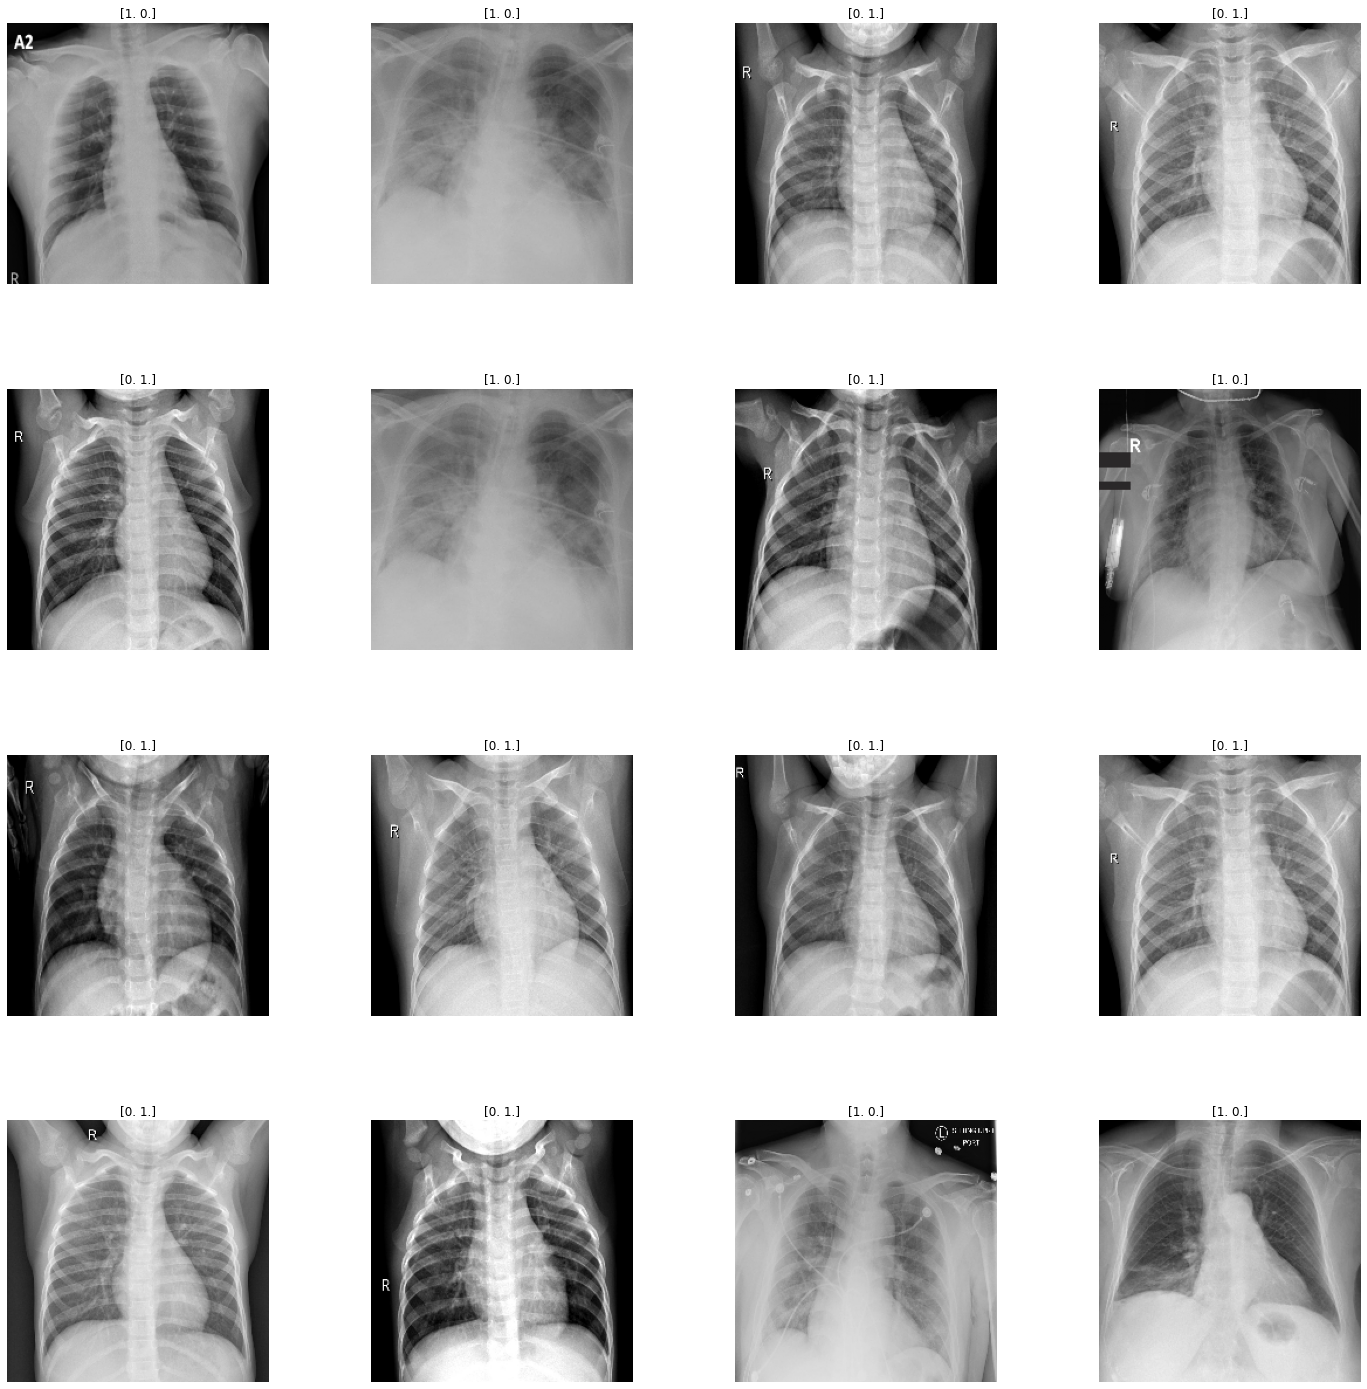

In [ ]:
W_grid = 4 #width
L_grid = 4 #length

fig , axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0,L_grid*W_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [ ]:
opt = Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss = 'binary_crossentropy',optimizer=opt,metrics=['accuracy'])
print('Compiling Starts')

Compiling Starts


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
20/20 [==============================] - 104s 5s/step - loss: 0.7182 - accuracy: 0.5625 - val_loss: 0.5910 - val_accuracy: 0.9250
Epoch 2/10
20/20 [==============================] - 103s 5s/step - loss: 0.5573 - accuracy: 0.8125 - val_loss: 0.4892 - val_accuracy: 0.9500
Epoch 3/10
20/20 [==============================] - 105s 5s/step - loss: 0.4609 - accuracy: 0.9187 - val_loss: 0.4129 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 103s 5s/step - loss: 0.4052 - accuracy: 0.9062 - val_loss: 0.3466 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 104s 5s/step - loss: 0.3299 - accuracy: 0.9563 - val_loss: 0.2939 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 103s 5s/step - loss: 0.2702 - accuracy: 0.9625 - val_loss: 0.2446 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 104s 5s/step - loss: 0.2402 - accuracy: 0.9625 - val_loss: 0.2165 - val_accuracy: 1.0000
Epoch 8/10
20

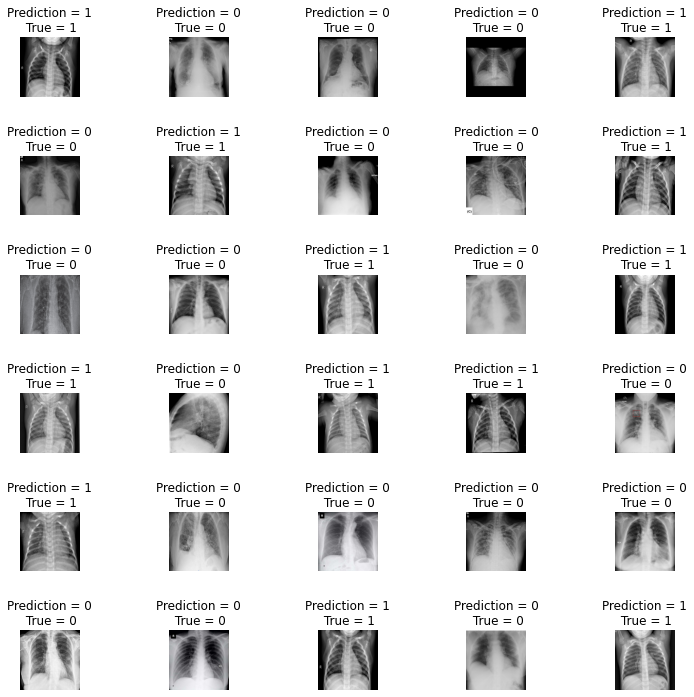

In [ ]:
L = 6
W = 5
fig , axes = plt.subplots(L , W , figsize = (12,12))
axes = axes.ravel()
y_pred = model.predict(X_test , batch_size = BS)
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(y_pred.argmax(axis=1)[i] , Y_test.argmax(axis=1)[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1 , hspace = 1)

**Preparing Model Evaluation Matrix**

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test , batch_size = BS)
y_pred = np.argmax(y_pred , axis =1)
print(classification_report(Y_test.argmax(axis = 1),y_pred,target_names = LB.classes_)) 


              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1),y_pred)
total = sum(sum(cm))
acc = (cm[0,0]+cm[1,1])/total
sensitivity = cm[0,0] / (cm[0,0]+cm[0,1])
specificity = cm[1,1] / (cm[1,0]+cm[1,1])
print(cm)
print("acc : {:.4f}".format(acc))
print("sensitivity : {:.4f}".format(sensitivity))
print("specificity : {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc : 1.0000
sensitivity : 1.0000
specificity : 1.0000


**Plot loss**

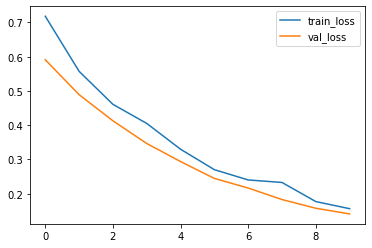

In [ ]:
#Plot the loss 

plt.plot(R.history['loss'] , label = 'train_loss')
plt.plot(R.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')



**Plot Accuracy**

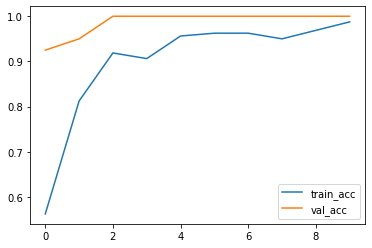

In [ ]:
#Plot the Accuracy

plt.plot(R.history['accuracy'] , label = 'train_acc')
plt.plot(R.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.show()

**Save the model to reuse it again**

In [ ]:
model.save(r'/content/drive/MyDrive/Dataset')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/assets


**Testing the model**

In [ ]:
import tensorflow as tf
from keras.preprocessing import image

model = tf.keras.models.load_model(r'/content/drive/MyDrive/Dataset')
from keras.applications.vgg16 import preprocess_input


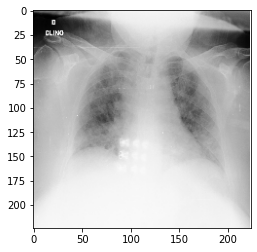

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Data/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',target_size=(224,224))
imgplot = plt.imshow(img)

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x

array([[[[133., 133., 133.],
         [121., 121., 121.],
         [115., 115., 115.],
         ...,
         [133., 133., 133.],
         [132., 132., 132.],
         [254., 254., 254.]],

        [[109., 109., 109.],
         [ 95.,  95.,  95.],
         [ 89.,  89.,  89.],
         ...,
         [128., 128., 128.],
         [124., 124., 124.],
         [254., 254., 254.]],

        [[ 56.,  56.,  56.],
         [ 46.,  46.,  46.],
         [ 48.,  48.,  48.],
         ...,
         [123., 123., 123.],
         [116., 116., 116.],
         [254., 254., 254.]],

        ...,

        [[247., 247., 247.],
         [243., 243., 243.],
         [242., 242., 242.],
         ...,
         [215., 215., 215.],
         [209., 209., 209.],
         [254., 254., 254.]],

        [[246., 246., 246.],
         [243., 243., 243.],
         [242., 242., 242.],
         ...,
         [216., 216., 216.],
         [214., 214., 214.],
         [254., 254., 254.]],

        [[245., 245., 245.],
       

In [ ]:
img_data = preprocess_input(x)
img_data

array([[[[ 29.060997 ,  16.221    ,   9.32     ],
         [ 17.060997 ,   4.2210007,  -2.6800003],
         [ 11.060997 ,  -1.7789993,  -8.68     ],
         ...,
         [ 29.060997 ,  16.221    ,   9.32     ],
         [ 28.060997 ,  15.221001 ,   8.32     ],
         [150.061    , 137.22101  , 130.32     ]],

        [[  5.060997 ,  -7.7789993, -14.68     ],
         [ -8.939003 , -21.779    , -28.68     ],
         [-14.939003 , -27.779    , -34.68     ],
         ...,
         [ 24.060997 ,  11.221001 ,   4.3199997],
         [ 20.060997 ,   7.2210007,   0.3199997],
         [150.061    , 137.22101  , 130.32     ]],

        [[-47.939003 , -60.779    , -67.68     ],
         [-57.939003 , -70.779    , -77.68     ],
         [-55.939003 , -68.779    , -75.68     ],
         ...,
         [ 19.060997 ,   6.2210007,  -0.6800003],
         [ 12.060997 ,  -0.7789993,  -7.6800003],
         [150.061    , 137.22101  , 130.32     ]],

        ...,

        [[143.061    , 130.22101  , 12

In [ ]:
classes = model.predict(img_data)
New_pred = np.argmax(classes , axis=1)
if New_pred == [1]:
  print("Prediction: Normal")
else:
  print("Prediction: Covid")


Prediction: Covid
